In [37]:
# Necessary imports
import pandas as pd
import numpy as np
import astropy
import matplotlib.pyplot as plt

import re

# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

ng=pd.read_csv('NGC.csv', low_memory=False)
ms=pd.read_csv('messier_objects.csv', low_memory=False)
cb=pd.read_csv('constellation_borders.csv', low_memory=False)
ty=pd.read_csv('tycho-1.csv', low_memory=False)


In [38]:
astropy.coordinates.get_constellation([0],[0])

AttributeError: module 'astropy' has no attribute 'coordinates'

## NGC

In [8]:
# print(ng.to_string())
display(ng)
print('empty mag:', ng['V'].isna().sum())
print('empty type:', ng['V'].isna().sum())
print('max mag:', ng['V'].max())
print('min mag:', ng['V'].min())
print('lowest declination:',ng['DEJ2000'].min())
print('highest declination:',ng['DEJ2000'].max())

,Unnamed: 0,Internal ID Number,Name,Common Name,Type,Constellation,V,RAJ2000,DEJ2000,Messier
0,0,Gal_And_IC 5370,IC 5370,-,Gal,Andromeda,15.0,0.0253,32.7500,0.0
1,1,notype_And_IC 5371,IC 5371,-,-,Andromeda,NaN,0.0503,32.8166,0.0
2,2,notype_Cas_NGC 7801,NGC 7801,-,-,Cassiopeia,NaN,0.1004,50.6999,0.0
3,3,Gal_And_IC 5372,IC 5372,-,Gal,Andromeda,15.0,0.1003,32.7833,0.0
4,4,Gal_And_IC 5373,IC 5373,-,Gal,Andromeda,15.0,0.1003,32.7833,0.0
...,...,...,...,...,...,...,...,...,...,...
13221,13221,Gal_And_IC 1525,IC 1525,-,Gal,Andromeda,NaN,359.8504,46.8999,0.0
13222,13222,Gal_Peg_NGC 7799,NGC 7799,-,Gal,Pegasus,NaN,359.8753,31.2833,0.0
13223,13223,Gal_Peg_NGC 7800,NGC 7800,-,Gal,Pegasus,13.0,359.9003,14.8167,0.0
13224,13224,Gal_Cet_NGC 7807,NGC 7807,-,Gal,Cetus,NaN,359.9003,-18.8500,0.0


empty mag: 5460
empty type: 5460
max mag: 18.0
min mag: 1.9
lowest declination: -89.3332
highest declination: 89.1168


In [9]:
ng[ng["Messier"]==1]

,Unnamed: 0,Internal ID Number,Name,Common Name,Type,Constellation,V,RAJ2000,DEJ2000,Messier
346,346,Gal_And_NGC 205,NGC 205,M 110,Gal,Andromeda,8.0,10.091894,41.685416,1.0
371,371,Gal_And_NGC 221,NGC 221,M 32,Gal,Andromeda,8.2,10.674271,40.865169,1.0
373,373,Gal_And_NGC 224,NGC 224,"Great Nebula in Andromeda, M 31",Gal,Andromeda,3.5,10.684708,41.268750,1.0
973,973,OpC_Cas_NGC 581,NGC 581,M 103,OpC,Cassiopeia,7.4,23.346000,60.650000,1.0
990,990,Gal_Tri_NGC 598,NGC 598,"M 33, Triangulum galaxy",Gal,Triangulum,5.7,23.462100,30.659942,1.0
...,...,...,...,...,...,...,...,...,...,...
12104,12104,GlC_Peg_NGC 7078,NGC 7078,M 15,GlC,Pegasus,6.4,322.493040,12.167000,1.0
12115,12115,OpC_Cyg_NGC 7092,NGC 7092,"M 39, M 40",OpC,Cygnus,4.6,322.950000,48.433000,1.0
12122,12122,GlC_Aqr_NGC 7089,NGC 7089,M 2,GlC,Aquarius,6.5,323.362580,-0.823250,1.0
12151,12151,GlC_Cap_NGC 7099,NGC 7099,M 30,GlC,Capricornus,7.5,325.092170,-23.179860,1.0


## Messiers

In [10]:
# print(ms.to_string())
display(ms)
print('empty mag:', ms['V (from SEDS)'].isna().sum())
print('empty type:', ms['Type'].isna().sum())
print('max mag:', ms['V (from SEDS)'].max())
print('min mag:', ms['V (from SEDS)'].min())
print('lowest declination:',ms['DEJ2000'].min())
print('highest declination:',ms['DEJ2000'].max())

,Internal ID Number,ID (for resolver),NGC,MAIN_ID,Common Name,Type,Constellation,RAJ2000,DEJ2000,V (from SEDS),V,B-V
0,SNR_Tau_M1,M 1,NGC 1952,M 1,Crab Nebula,SNR,Taurus,83.633080,22.014500,8.4,NaN,NaN
1,GlC_Aqr_M2,M 2,NGC 7089,M 2,-,GlC,Aquarius,323.362580,-0.823250,6.5,6.25,NaN
2,GlC_CVn_M3,M 3,NGC 5272,M 3,-,GlC,Canes Venatici,205.548420,28.377280,6.2,6.39,NaN
3,GlC_Sco_M4,M 4,NGC 6121,M 4,-,GlC,Scorpius,245.896750,-26.525750,5.6,NaN,NaN
4,GlC_Ser_M5,M 5,NGC 5904,M 5,-,GlC,Serpens,229.638420,2.081030,5.6,5.95,1.39
...,...,...,...,...,...,...,...,...,...,...,...,...
105,Sy2_CVn_M106,M 106,NGC 4258,M 106,-,Sy2,Canes Venatici,184.740083,47.303719,8.4,8.41,0.73
106,GlC_Oph_M107,M 107,NGC 6171,M 107,-,GlC,Ophiucus,248.132750,-13.053780,7.9,8.85,1.11
107,SBG_UMa_M108,M 108,NGC 3556,M 108,-,SBG,Ursa Major,167.879029,55.674122,10.0,NaN,NaN
108,GiG_UMa_M109,M 109,NGC 3992,M 109,-,GiG,Ursa Major,179.399933,53.374519,9.8,NaN,NaN


empty mag: 0
empty type: 0
max mag: 10.2
min mag: 1.6
lowest declination: -34.793
highest declination: 69.679703


In [34]:
hopobj='m 1'

In [35]:
 messier = hopobj.capitalize()[0]+' '+hopobj.capitalize()[1:].strip()

In [36]:
messier in ms['ID (for resolver)'].values

True

In [19]:
messier in ms['ID (for resolver)'].values()

TypeError: 'numpy.ndarray' object is not callable

In [18]:
'M 1' in ms

False

## Unique object types in NGC and Messier Catalogue

In [16]:
print(ng['Type'].unique())
print(ms['Type'].unique())

['Gal' '-' 'Nb' 'Str' 'Ast' 'PN' 'GlC' 'OpC' 'D*?' 'C+N' 'Kt' 'PD' '*?']
['SNR' 'GlC' 'OpC' 'HII' 'As*' 'PN' 'G' 'IG' 'GiG' 'mul' 'Sy2' 'GiP' 'SyG'
 'LIN' 'Cl*' 'RNe' 'SBG' 'BiC' 'H2G' 'AGN']


## Grouping similar type objects; for plotting 

## Constellation borders

In [17]:
display(cb)

,RAJ2000,DEJ2000,Constellation
0,353.035698,35.189774,Andromeda
1,352.027387,35.188026,Andromeda
2,351.018963,35.186070,Andromeda
3,350.010539,35.183899,Andromeda
4,349.002342,35.181519,Andromeda
...,...,...,...
13034,291.873809,19.418251,Vulpecula
13035,290.872306,19.406878,Vulpecula
13036,290.121288,19.398298,Sagitta
13037,290.108328,20.398224,Sagitta


## Tycho-1 Catalogue

In [190]:
print('empty mag:', ty['V'].isna().sum())
print('with res2:', len(ty) - ty['Name'].isna().sum())
print('with bayer:', len(ty) - ty['Bayer'].isna().sum())
print('max mag:', ty['V'].max())
print('min mag:', ty['V'].min())
display(ty)
dup_ty = ty.copy(deep=True)  # Tycho
dup_ty['RAJ2000'] -= 360  # Constellation borders transform
display(dup_ty)

empty mag: 0
with res2: 592159
with bayer: 3698
max mag: 10.5
min mag: -1.44


,Internal ID Number,Name,Constellation,Bayer,HIP,TYC,HD,RAJ2000,DEJ2000,V,B-V
0,Str_CMa_00000001,Sirius,Canis Major,alf CMa,32349.0,5949 2777 1,NaN,101.288541,-16.713143,-1.44,NaN
1,Str_Car_00000002,Canopus,Carina,alf Car,30438.0,8534 2277 1,45348.0,95.987951,-52.695650,-0.63,0.173
2,Str_Cen_00000003,Rigil Kentaurus,Centaurus,alf Cen,71683.0,9007 5849 1,NaN,219.920410,-60.835147,-0.01,NaN
3,Str_Lyr_00000004,Vega,Lyra,alf Lyr,91262.0,3105 2070 1,NaN,279.234108,38.782993,0.03,NaN
4,Str_Aur_00000005,Capella,Auriga,alf Aur,24608.0,3358 3141 1,NaN,79.172065,45.999029,0.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...
592154,Str_Oct_00592155,-,Octans,NaN,NaN,9525 1122 1,NaN,347.101321,-83.261598,10.50,1.129
592155,Str_Oct_00592156,-,Octans,NaN,NaN,9526 1141 1,NaN,263.554830,-86.048977,10.50,0.446
592156,Str_Oct_00592157,-,Octans,NaN,NaN,9527 563 1,NaN,292.934492,-85.876995,10.50,0.846
592157,Str_Oct_00592158,-,Octans,NaN,NaN,9528 1932 1,NaN,313.888285,-84.824245,10.50,0.546


,Internal ID Number,Name,Constellation,Bayer,HIP,TYC,HD,RAJ2000,DEJ2000,V,B-V
0,Str_CMa_00000001,Sirius,Canis Major,alf CMa,32349.0,5949 2777 1,NaN,-258.711459,-16.713143,-1.44,NaN
1,Str_Car_00000002,Canopus,Carina,alf Car,30438.0,8534 2277 1,45348.0,-264.012049,-52.695650,-0.63,0.173
2,Str_Cen_00000003,Rigil Kentaurus,Centaurus,alf Cen,71683.0,9007 5849 1,NaN,-140.079590,-60.835147,-0.01,NaN
3,Str_Lyr_00000004,Vega,Lyra,alf Lyr,91262.0,3105 2070 1,NaN,-80.765892,38.782993,0.03,NaN
4,Str_Aur_00000005,Capella,Auriga,alf Aur,24608.0,3358 3141 1,NaN,-280.827935,45.999029,0.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...
592154,Str_Oct_00592155,-,Octans,NaN,NaN,9525 1122 1,NaN,-12.898679,-83.261598,10.50,1.129
592155,Str_Oct_00592156,-,Octans,NaN,NaN,9526 1141 1,NaN,-96.445170,-86.048977,10.50,0.446
592156,Str_Oct_00592157,-,Octans,NaN,NaN,9527 563 1,NaN,-67.065508,-85.876995,10.50,0.846
592157,Str_Oct_00592158,-,Octans,NaN,NaN,9528 1932 1,NaN,-46.111715,-84.824245,10.50,0.546


In [18]:
a=


In [41]:
res1 = np.array(ms['ID (for resolver)'])
res2 = np.array(ms['Common Name'])
res3 = np.array(ng['Common Name'])
res4 = np.array(ty[ty['Name']!='-']['Name'])

In [ ]:
while True:
    text = input('Name of Object -- ',)
    lst = text.split()


    if all([x.isalpha() for x in lst]):
        text = text.title()
        find_res = np.array([x.find(text) for x in res2])
        pos = np.where(find_res!=-1)[0]
        if len(pos)==0:
            print('No such object. Try again.')
            continue
        ra, dec = ms['RAJ2000'][pos].values, ms['DEJ2000'][pos].values
        if len(res2[pos])>1:
            print('Choose one of:')
            [print('{} ({})'.format(res2[pos][i],res1[pos][i])) for i in range(len(res2[pos]))]
            continue
        else:
            print(res2[pos][0],ra[0],dec[0])
        break
    
    elif all([x.isalnum() for x in lst]): 
        text = text.title()
        text = re.split('(\d+)',text)
        print(text)
        text[0] = text[0].rstrip()
        print(text[0])
        text = text[:2]
        print(text)
        text = ' '.join(text)
        find_res = np.array([x.find(text) for x in res1])
        pos = np.where(find_res!=-1)[0]
        if len(pos)==0:
            print('No such object. Try again.')
            continue
        ra, dec = ms['RAJ2000'][pos].values, ms['DEJ2000'][pos].values
        print(res1[pos][0],ra[0],dec[0])
        break
        
    elif all([x.isalpha() for x in lst]): 
        text = text.title()
        find_res = np.array([x.find(text) for x in res3])
        pos = np.where(find_res!=-1)[0]
        if len(pos)==0:
            print('No such object. Try again.')
            continue
        ra, dec = ng['RAJ2000'][pos].values, ng['DEJ2000'][pos].values
        if len(res3[pos])>1:
            print('Choose one of:')
            [print('{} ({})'.format(res3[pos][i]) for i in range(len(res2[pos]))]
            continue
        else:
            print(res3[pos][0],ra[0],dec[0])
        break
        
    elif all([x.isalpha() for x in lst]): 
        text = text.title()
        find_res = np.array([x.find(text) for x in res4])
        pos = np.where(find_res!=-1)[0]
        if len(pos)==0:
            print('No such object. Try again.')
            continue
        ra, dec = ms['RAJ2000'][pos].values, ms['DEJ2000'][pos].values
        if len(res2[pos])>1:
            print('Choose one of:')
            [print('{} ({})'.format(res4[pos][i]) for i in range(len(res2[pos]))]
            continue
        else:
            print(res4[pos][0],ra[0],dec[0])
        break
        
    else:
        print('No such object. Try again.')

In [53]:
all([x.isalnum() for x in ['m5','4']])

True

In [80]:
d['hello'].append([2,4])

In [82]:
d['hello']

[(2, 4), [2, 4]]

In [88]:
d['hello'][-1][0]

2

In [89]:
a=4

In [90]:
d['abc{}'.format(a)]='abc'

In [91]:
d

{'hello': [(2, 4), [2, 4]], 'abc4': 'abc'}

In [95]:
d['dsf']=[]

In [96]:
d['dsf'].append(7)

In [107]:
d['hello'][-1][-1]


4

In [123]:
text='2'
lst=['2']
import re
import numpy as np

df = pd.DataFrame(ms)
res1 = np.array(df['ID (for resolver)'])
res2 = np.array(df['Common Name'])


In [127]:
if all([x.isalnum() for x in lst]):
    text = text.title()

    text = re.split('(\d+)', text)
    text[0] = text[0].rstrip()
    text = text[:2]
    text = ' '.join(text)
    find_res = np.array([x.find(text) for x in res1])
    pos = np.where(find_res != -1)[0]
    if len(pos) == 0:
        print("first")
    else:
        ra, dec = df['RAJ2000'][pos].values, df['DEJ2000'][pos].values
        fov = 5
        print(ra, dec)
        print(ra, dec,'\n')
        xl = ra - fov / 2 - fov / 10
        xr = ra + fov / 2 + fov / 10
        yb = dec - fov / 2 - fov / 10
        yt = dec + fov / 2 + fov / 10
        print(xl,xr,yb,yt)

        if xr > 360:
            ra -= 360
            xr -= 360
            xl -= 360
        print(xl,xr,yb,yt)


[323.36258    270.675      271.054      279.09975    269.267
 274.2        277.946      281.325      299.90151337 276.13704
 305.983     ] [ -0.82325    -22.972      -22.49       -23.90475    -18.985
 -18.55       -19.117       -9.383       22.72119788 -24.86983
  38.523     ]
[323.36258    270.675      271.054      279.09975    269.267
 274.2        277.946      281.325      299.90151337 276.13704
 305.983     ] [ -0.82325    -22.972      -22.49       -23.90475    -18.985
 -18.55       -19.117       -9.383       22.72119788 -24.86983
  38.523     ] 

[320.36258    267.675      268.054      276.09975    266.267
 271.2        274.946      278.325      296.90151337 273.13704
 302.983     ] [326.36258    273.675      274.054      282.09975    272.267
 277.2        280.946      284.325      302.90151337 279.13704
 308.983     ] [ -3.82325    -25.972      -25.49       -26.90475    -21.985
 -21.55       -22.117      -12.383       19.72119788 -27.86983
  35.523     ] [  2.17675    -19.972    

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [130]:
ms.iloc[2]['RAJ2000']

205.54842

In [4]:
ga_ms = ms[(ms["TYPE"] == 'G') | (ms["TYPE"] == 'Sy2') | (ms["TYPE"] == 'IG') | (ms["TYPE"] == 'GiG') | (
        ms["TYPE"] == 'GiP') | (ms["TYPE"] == 'SyG') | (ms["TYPE"] == 'SBG') | (ms["TYPE"] == 'BiC') | (
                   ms["TYPE"] == 'H2G')]

In [5]:
ga_ms


,Internal ID Number,ID (for resolver),MAIN_ID,Common Name,TYPE,Constellation,RAJ2000,DEJ2000,V (from SEDS),V,B-V
30,G_And_M31,M 31,M 31,Andromeda Galaxy,G,Andromeda,10.684708,41.268750,3.4,3.44,0.920000
31,IG_And_M32,M 32,M 32,-,IG,Andromeda,10.674271,40.865169,8.1,8.08,0.950000
32,GiG_Tri_M33,M 33,M 33,Triangulum Galaxy,GiG,Triangulum,23.462100,30.659942,5.7,5.72,0.550000
48,Sy2_Vir_M49,M 49,M 49,-,Sy2,Virgo,187.444992,8.000411,8.4,12.17,1.040000
50,GiP_CVn_M51,M 51,M 51,Whirlpool Galaxy,GiP,Canes Venatici,202.469575,47.195258,8.4,8.36,0.900001
57,SyG_Vir_M58,M 58,M 58,-,SyG,Virgo,189.431654,11.818089,9.7,9.66,0.820000
58,GiG_Vir_M59,M 59,M 59,-,GiG,Virgo,190.509675,11.646931,9.6,NaN,NaN
59,GiP_Vir_M60,M 60,M 60,-,GiP,Virgo,190.916700,11.552611,8.8,NaN,NaN
60,Sy2_Vir_M61,M 61,M 61,-,Sy2,Virgo,185.478865,4.473775,9.7,9.65,0.530001
63,SyG_Com_M64,M 64,M 64,Black Eye Galaxy,SyG,Coma Berenices,194.182067,21.682658,8.5,8.52,0.839999


In [43]:
ga_ms.sort_values(by=['V (from SEDS)'], inplace=True)


In [45]:
ga_ms

,Internal ID Number,ID (for resolver),MAIN_ID,Common Name,TYPE,Constellation,RAJ2000,DEJ2000,V (from SEDS),V,B-V
30,G_And_M31,M 31,M 31,Andromeda Galaxy,G,Andromeda,10.684708,41.268750,3.4,3.44,0.920000
32,GiG_Tri_M33,M 33,M 33,Triangulum Galaxy,GiG,Triangulum,23.462100,30.659942,5.7,5.72,0.550000
80,Sy2_UMa_M81,M 81,M 81,Bode's Galaxy,Sy2,Ursa Major,148.888221,69.065295,6.9,6.94,0.950000
82,SBG_Hya_M83,M 83,M 83,Southern Pinwheel Galaxy,SBG,Hydra,204.253829,-29.865761,7.6,7.52,0.590000
100,GiP_UMa_M101,M 101,M 101,Pinwheel Galaxy,GiP,Ursa Major,210.802429,54.348750,7.9,7.86,0.600000
31,IG_And_M32,M 32,M 32,-,IG,Andromeda,10.674271,40.865169,8.1,8.08,0.950000
93,SyG_CVn_M94,M 94,M 94,Croc's Eye or Cat's Eye,SyG,Canes Venatici,192.721450,41.120153,8.2,8.24,0.720000
50,GiP_CVn_M51,M 51,M 51,Whirlpool Galaxy,GiP,Canes Venatici,202.469575,47.195258,8.4,8.36,0.900001
105,Sy2_CVn_M106,M 106,M 106,-,Sy2,Canes Venatici,184.740083,47.303719,8.4,8.41,0.730000
48,Sy2_Vir_M49,M 49,M 49,-,Sy2,Virgo,187.444992,8.000411,8.4,12.17,1.040000


In [41]:
len(np.arange(20, 270+70, 17))

19

In [12]:
from scipy import spatial
import numpy as np

x=np.array(ty['RAJ2000'])
y=np.array(ty['DEJ2000'])



In [7]:
# for x in zip(x,y):
x, y = np.mgrid[0:5, 2:8]


In [13]:
x

array([101.28854105,  95.98795057, 219.92041034, ..., 292.93449204,
       313.88828539, 259.38675268])

In [14]:
x.ravel()

array([101.28854105,  95.98795057, 219.92041034, ..., 292.93449204,
       313.88828539, 259.38675268])

In [15]:
tree = spatial.KDTree(list(zip(x, y)))
print(tree.data)

[[101.28854105 -16.71314306]
 [ 95.98795057 -52.6956495 ]
 [219.92041034 -60.83514707]
 ...
 [292.93449204 -85.87699497]
 [313.88828539 -84.82424454]
 [259.38675268 -86.79279151]]


In [16]:
points=np.array([0,00])
print(tree.query(points))

(0.23542137993200615, 170004)


In [105]:
x=np.arange(0,10,1)
y=x**2
m=np.random.uniform(size=10)
d = pd.DataFrame(zip(x,y,m), columns=['x', 'y', 'm'])


In [107]:
d

,x,y,m
0,0,0,0.982963
1,1,1,0.330621
2,2,4,0.510526
3,3,9,0.585921
4,4,16,0.813369
5,5,25,0.169649
6,6,36,0.534686
7,7,49,0.747554
8,8,64,0.650619
9,9,81,0.619110


In [197]:
y=np.array(ty['RAJ2000'], dup_ty['RAJ2000'])

In [198]:
x==y

array([ True,  True,  True, ...,  True,  True,  True])

In [186]:
y=np.array(d['y'])
a=1
b=2

In [188]:
[a,b]

[1, 2]

In [117]:
for i in (zip(x,y)):
    print(i)

(0, 0)
(1, 1)
(2, 4)
(3, 9)
(4, 16)
(5, 25)
(6, 36)
(7, 49)
(8, 64)
(9, 81)


[ 2.          7.07106781 13.03840481 14.14213562 19.23538406] [5 4 6 3 2]


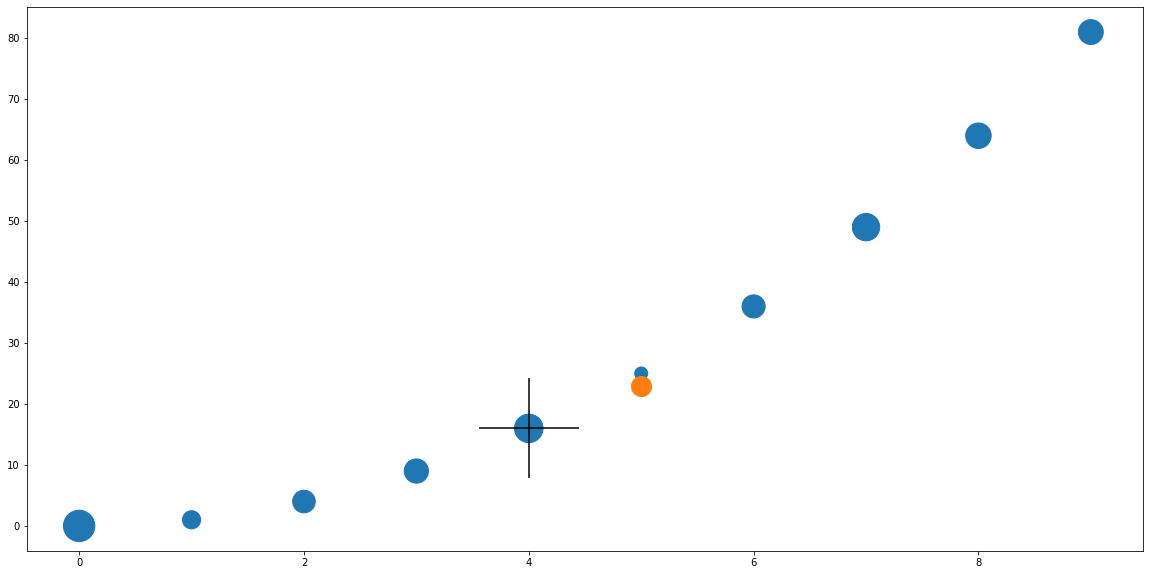

In [185]:
fig, ax=plt.subplots(1,1, figsize=(20,10))
ax.scatter(d['x'], d['y'], s=m*1000)
a=[5]
b=[22+1]
ax.scatter(a[0],b[0], s=400)

    tree = spatial.KDTree(list(zip(x.ravel(), y.ravel())))
    points=np.array([a[0],b[0]])
    dist,ind = tree.query(points, k=5)
print(dist, ind)
ax.scatter(d['x'][d['m'][ind].idxmax()],  d['y'][d['m'][ind].idxmax()], c='black', s=10000, marker='+')
plt.show()


In [180]:
.max()

0.7475535807471334

In [182]:
d['m'][ind].idxmax()

7

In [141]:
dist, ind

(array([7.28010989, 7.81024968]), array([3, 4]))